In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# Get data

In [9]:
from nsepy import get_history
from datetime import date
data = get_history(symbol="PNB", start=date(1995,1,1), end=date(2018,1,9))
data.shape

(3915, 14)

In [10]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2002-04-26,PNB,EQ,31.0,40.00,40.00,35.00,37.30,37.40,37.03,4000760.0,1.481550e+13,NaN,2048637.0,0.5121
2002-04-29,PNB,EQ,37.4,38.50,39.10,37.65,39.10,38.60,38.26,2602886.0,9.957692e+12,NaN,1632801.0,0.6273
2002-04-30,PNB,EQ,38.6,39.00,40.35,38.50,40.15,40.10,39.79,1377334.0,5.480687e+12,NaN,NaN,NaN
2002-05-02,PNB,EQ,40.1,40.25,46.10,40.25,45.10,44.80,44.15,3348126.0,1.478202e+13,NaN,1307465.0,0.3905
2002-05-03,PNB,EQ,44.8,45.80,47.45,44.55,46.95,46.45,46.10,2689672.0,1.239910e+13,NaN,1032559.0,0.3839


In [11]:
columns = ['Volume','Open','High','Close','Low','VWAP','Turnover']

In [12]:
stock_data=data[columns]

In [114]:
stock_data.tail()

,Volume,Open,High,Close,Low,VWAP,Turnover
Date,,,,,,,
2018-01-03,8534233.0,168.00,169.30,166.60,166.20,167.66,1.430885e+14
2018-01-04,31613344.0,167.35,179.70,176.45,165.40,172.88,5.465303e+14
2018-01-05,15500426.0,180.40,180.50,176.00,175.40,177.47,2.750899e+14
2018-01-08,7302294.0,177.05,178.15,175.70,175.10,176.41,1.288170e+14
2018-01-09,11152776.0,175.30,177.90,174.65,174.05,176.09,1.963904e+14


In [115]:
stock_data.isnull().sum()

Volume      0
Open        0
High        0
Close       0
Low         0
VWAP        0
Turnover    0
dtype: int64

In [112]:
import os
print(os.getcwd())
os.chdir('C:\\Users\\G560667\\stock-trader\\')
print(os.getcwd())

C:\Users\G560667\stock-trader
C:\Users\G560667\stock-trader


In [16]:
stock_data.to_csv('PNB_Latest.csv')

In [119]:
df=stock_data##Reverse Data Frame

In [120]:
df.head()

,Volume,Open,High,Close,Low,VWAP,Turnover
Date,,,,,,,
2002-04-26,4000760.0,40.00,40.00,37.40,35.00,37.03,1.481550e+13
2002-04-29,2602886.0,38.50,39.10,38.60,37.65,38.26,9.957692e+12
2002-04-30,1377334.0,39.00,40.35,40.10,38.50,39.79,5.480687e+12
2002-05-02,3348126.0,40.25,46.10,44.80,40.25,44.15,1.478202e+13
2002-05-03,2689672.0,45.80,47.45,46.45,44.55,46.10,1.239910e+13


In [ ]:
##Basic Data Cleaning
df["Close"] = (df["Close"].str.split()).apply(lambda x: float(x[0].replace(',', '.')))
df["Open"] = (df["Open"].str.split()).apply(lambda x: float(x[0].replace(',', '.')))
df["High"] = (df["High"].str.split()).apply(lambda x: float(x[0].replace(',', '.')))
df["Low"] = (df["Low"].str.split()).apply(lambda x: float(x[0].replace(',', '.')))
df["Volume"] = (df["Volume"].str.split()).apply(lambda x: float(x[0].replace(',', '.')))
df["VWAP"] = (df["VWAP"].str.split()).apply(lambda x: float(x[0].replace(',', '.')))
df["Turnover"] = (df["Turnover"].str.split()).apply(lambda x: float(x[0].replace(',', '.')))

In [121]:
price=df['Close']

In [122]:
type(price)

pandas.core.series.Series

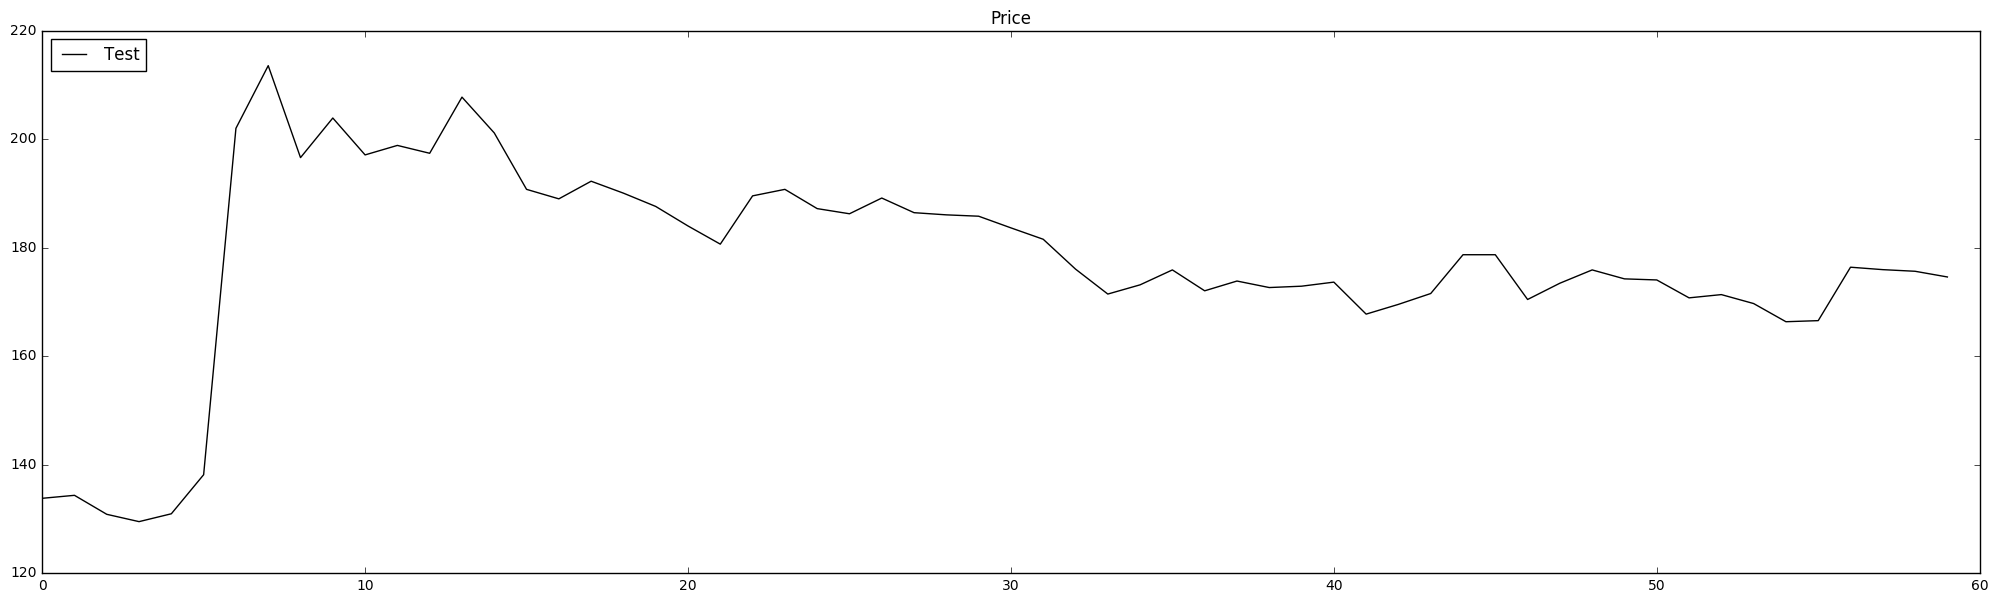

In [123]:
prices = price.iloc[len(price.index)-60:len(price.index)].as_matrix().ravel()
plt.figure(figsize=(25,7))
plt.plot(prices,label='Test',color='black')
plt.title('Price')
plt.legend(loc='upper left')
plt.show()

## Apply Indicators

In [81]:
def MACD(df,period1,period2,periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean()
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean()
    MACD = EMA1-EMA2
    
    Signal = pd.DataFrame.ewm(MACD,periodSignal).mean()
    
    Histogram = MACD-Signal
    
    return Histogram

def stochastics_oscillator(df,period):
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max()
    k = 100 * (df - l) / (h - l)
    return k

def ATR(df,period):
    '''
    Method A: Current High less the current Low
    '''
    df['H-L'] = abs(df['High']-df['Low'])
    df['H-PC'] = abs(df['High']-df['Close'].shift(1))
    df['L-PC'] = abs(df['Low']-df['Close'].shift(1))
    TR = df[['H-L','H-PC','L-PC']].max(axis=1)
    return TR.to_frame()

## MACD

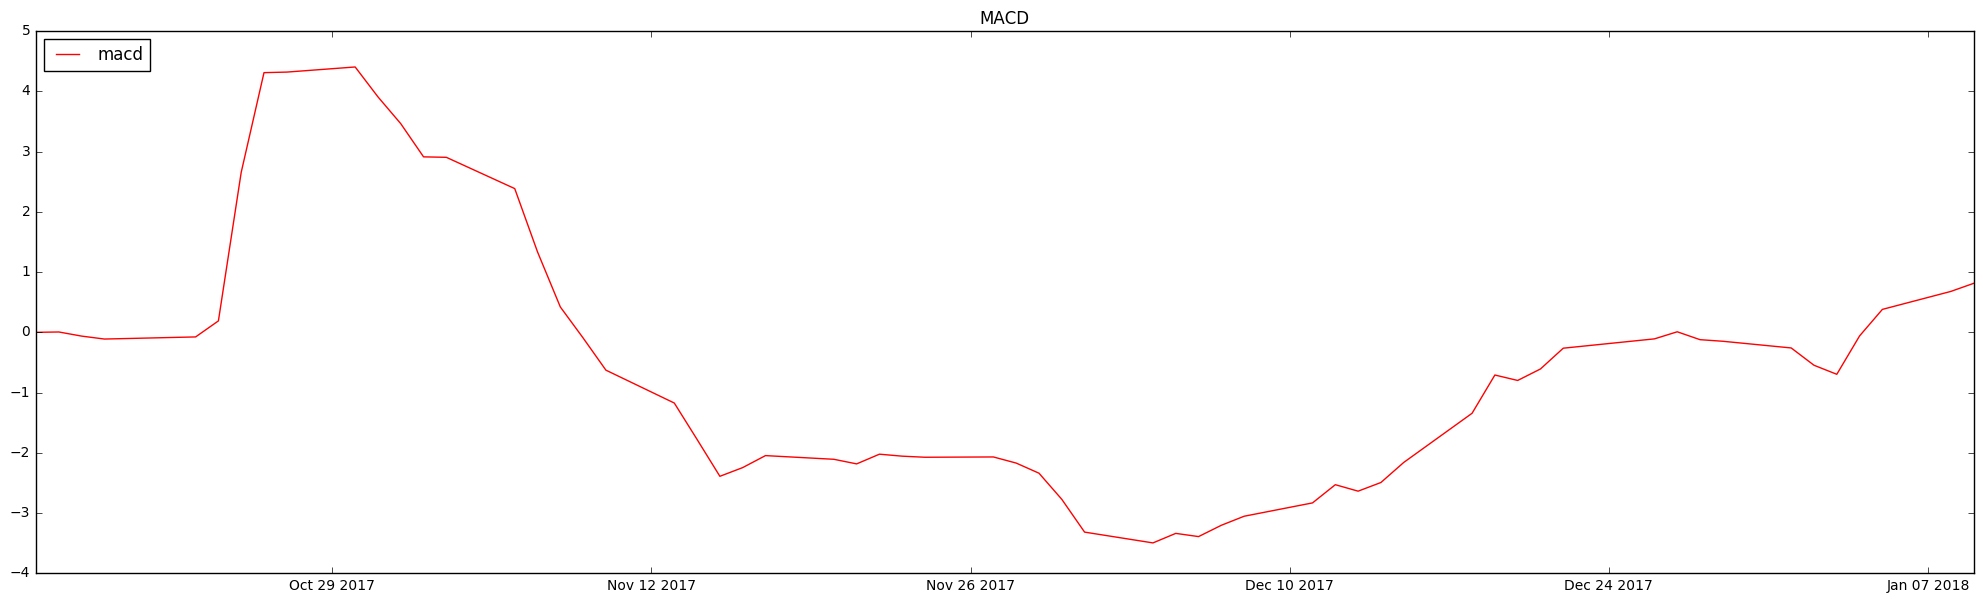

In [124]:
macd = MACD(price.iloc[len(price.index)-60:len(price.index)],12,26,9)
plt.figure(figsize=(25,7))
plt.plot(macd,label='macd',color='red')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

## Stochastics Oscillator

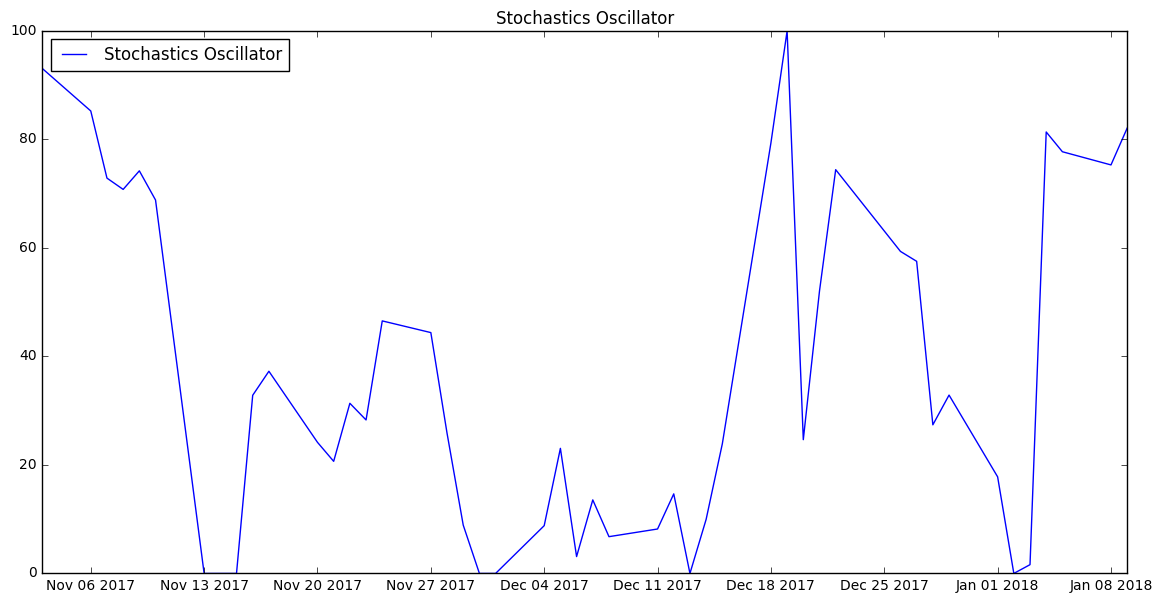

In [125]:
stochastics = stochastics_oscillator(price.iloc[len(price.index)-60:len(price.index)],14)
plt.figure(figsize=(14,7))
#First 100 points because it's too dense
plt.plot(stochastics[0:100],label='Stochastics Oscillator',color='blue')
plt.title('Stochastics Oscillator')
plt.legend(loc='upper left')
plt.show()

## Average True Range

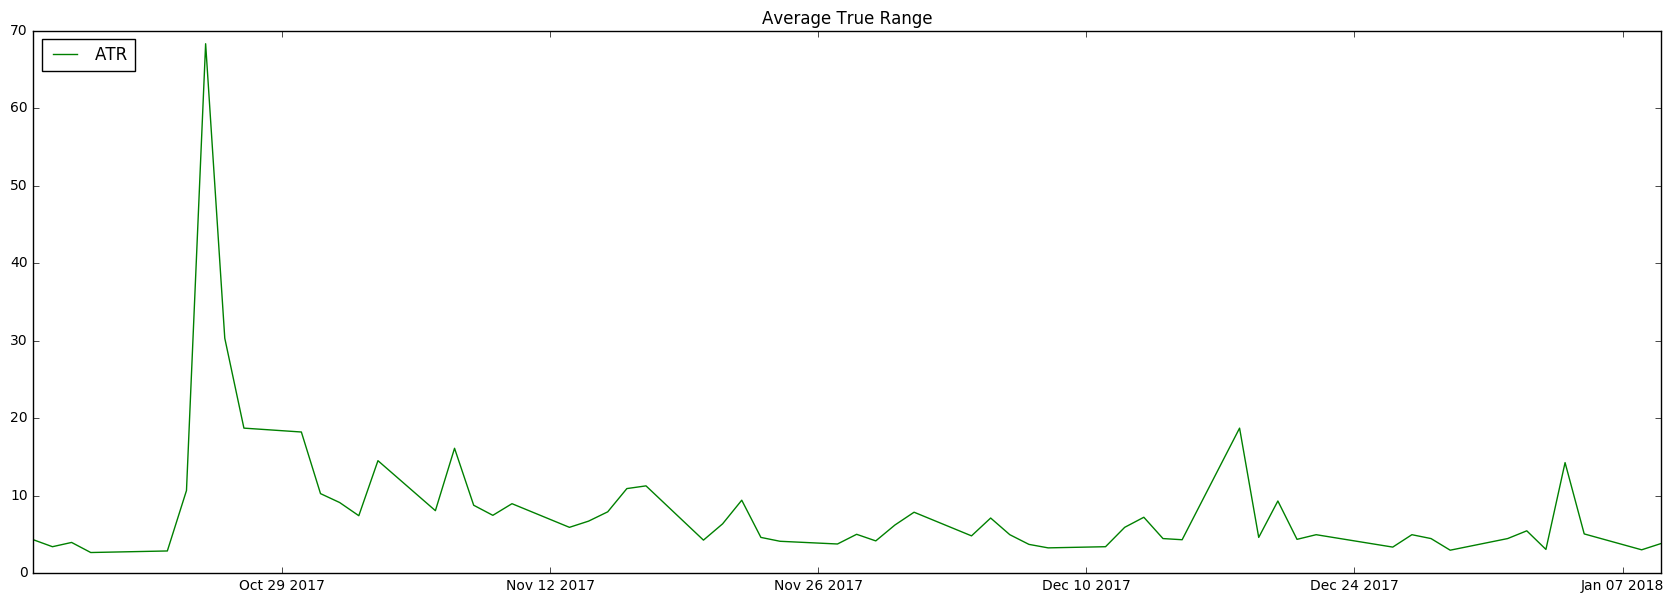

In [126]:
atr = ATR(df.iloc[len(df.index)-60:len(df.index)],14)
plt.figure(figsize=(21,7))
#First 100 points because it's too dense
plt.plot(atr[0:100],label='ATR',color='green')
plt.title('Average True Range')
plt.legend(loc='upper left')
plt.show()

## Create complete DataFrame & Save Data

In [127]:
dfPriceShift = price.shift(-1)

In [128]:
dfPriceShift.rename(columns={'Close':'CloseTarget'}, inplace=True)

Date
2002-04-26     38.60
2002-04-29     40.10
2002-04-30     44.80
2002-05-02     46.45
2002-05-03     46.70
2002-05-06     45.30
2002-05-07     43.40
2002-05-08     43.70
2002-05-09     43.35
2002-05-10     44.65
2002-05-13     43.50
2002-05-14     42.60
2002-05-15     41.25
2002-05-16     40.15
2002-05-17     38.70
2002-05-20     37.25
2002-05-21     37.15
2002-05-22     37.60
2002-05-23     38.85
2002-05-24     39.10
2002-05-27     38.10
2002-05-28     39.60
2002-05-29     39.00
2002-05-30     38.95
2002-05-31     38.10
2002-06-03     39.40
2002-06-04     42.75
2002-06-05     42.15
2002-06-06     42.90
2002-06-07     45.00
               ...  
2017-11-28    181.60
2017-11-29    176.10
2017-11-30    171.50
2017-12-01    173.20
2017-12-04    175.95
2017-12-05    172.10
2017-12-06    173.90
2017-12-07    172.70
2017-12-08    172.95
2017-12-11    173.70
2017-12-12    167.80
2017-12-13    169.60
2017-12-14    171.60
2017-12-15    178.75
2017-12-18    178.75
2017-12-19    170.50
2017-12-

In [130]:
dfPriceShift.head(2)

Date
2002-04-26    38.6
2002-04-29    40.1
dtype: float64

In [131]:
macd = MACD(price,12,26,9)
macd.rename(columns={'Close':'MACD'}, inplace=True)

Date
2002-04-26    0.000000
2002-04-29    0.012753
2002-04-30    0.042056
2002-05-02    0.166156
2002-05-03    0.249807
2002-05-06    0.276151
2002-05-07    0.216950
2002-05-08    0.093036
2002-05-09    0.024549
2002-05-10   -0.037200
2002-05-13   -0.018427
2002-05-14   -0.063997
2002-05-15   -0.138279
2002-05-16   -0.252580
2002-05-17   -0.378053
2002-05-20   -0.526664
2002-05-21   -0.687289
2002-05-22   -0.776824
2002-05-23   -0.783670
2002-05-24   -0.686719
2002-05-27   -0.578899
2002-05-28   -0.540879
2002-05-29   -0.401243
2002-05-30   -0.323050
2002-05-31   -0.255927
2002-06-03   -0.248595
2002-06-04   -0.147145
2002-06-05    0.148631
2002-06-06    0.317269
2002-06-07    0.478831
                ...   
2017-11-28   -3.577822
2017-11-29   -3.900580
2017-11-30   -4.480823
2017-12-01   -5.154391
2017-12-04   -5.414089
2017-12-05   -5.292115
2017-12-06   -5.372721
2017-12-07   -5.181835
2017-12-08   -5.015084
2017-12-11   -4.760853
2017-12-12   -4.411728
2017-12-13   -4.479238
2017-1

In [132]:
stochastics = stochastics_oscillator(price,14)
stochastics.rename(columns={'Close':'Stochastics'}, inplace=True)

Date
2002-04-26           NaN
2002-04-29           NaN
2002-04-30           NaN
2002-05-02           NaN
2002-05-03           NaN
2002-05-06           NaN
2002-05-07           NaN
2002-05-08           NaN
2002-05-09           NaN
2002-05-10           NaN
2002-05-13           NaN
2002-05-14           NaN
2002-05-15           NaN
2002-05-16     41.397849
2002-05-17     19.135802
2002-05-20      0.000000
2002-05-21      0.000000
2002-05-22      0.000000
2002-05-23      4.712042
2002-05-24     20.858896
2002-05-27     26.000000
2002-05-28     12.666667
2002-05-29     32.666667
2002-05-30     24.666667
2002-05-31     28.346457
2002-06-03     17.431193
2002-06-04     54.878049
2002-06-05    100.000000
2002-06-06     89.285714
2002-06-07    100.000000
                 ...    
2017-11-28     25.862069
2017-11-29      8.910891
2017-11-30      0.000000
2017-12-01      0.000000
2017-12-04      8.808290
2017-12-05     23.056995
2017-12-06      3.108808
2017-12-07     13.559322
2017-12-08      6.77

In [133]:
atr = ATR(df,14)
atr.rename(columns={0:'ATR'}, inplace=True)

In [134]:
final_data = pd.concat([price,dfPriceShift,macd,stochastics,atr], axis=1)

In [135]:
final_data.head()
final_data.rename(columns={0:'CloseTarget'}, inplace=True)
final_data.rename(columns={1:'MACD'}, inplace=True)
final_data.rename(columns={2:'Stochastics'}, inplace=True)

In [136]:
final_data.head()

,Close,CloseTarget,MACD,Stochastics,ATR
Date,,,,,
2002-04-26,37.40,38.60,0.000000,NaN,5.00
2002-04-29,38.60,40.10,0.012753,NaN,1.70
2002-04-30,40.10,44.80,0.042056,NaN,1.85
2002-05-02,44.80,46.45,0.166156,NaN,6.00
2002-05-03,46.45,46.70,0.249807,NaN,2.90


In [137]:
final_data['Stochastics'].fillna(0, inplace=True)

In [138]:
type(final_data)

pandas.core.frame.DataFrame

In [139]:
final_data.head()

,Close,CloseTarget,MACD,Stochastics,ATR
Date,,,,,
2002-04-26,37.40,38.60,0.000000,0.0,5.00
2002-04-29,38.60,40.10,0.012753,0.0,1.70
2002-04-30,40.10,44.80,0.042056,0.0,1.85
2002-05-02,44.80,46.45,0.166156,0.0,6.00
2002-05-03,46.45,46.70,0.249807,0.0,2.90


In [140]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3915 entries, 2002-04-26 to 2018-01-09
Data columns (total 5 columns):
Close          3915 non-null float64
CloseTarget    3914 non-null float64
MACD           3915 non-null float64
Stochastics    3915 non-null float64
ATR            3915 non-null float64
dtypes: float64(5)
memory usage: 183.5+ KB


In [141]:
final_data.tail()

,Close,CloseTarget,MACD,Stochastics,ATR
Date,,,,,
2018-01-03,166.60,176.45,-1.604985,1.619433,3.10
2018-01-04,176.45,176.00,-0.907958,81.376518,14.30
2018-01-05,176.00,175.70,-0.411781,77.732794,5.10
2018-01-08,175.70,174.65,-0.061824,75.303644,3.05
2018-01-09,174.65,NaN,0.120088,82.089552,3.85


In [142]:
final_data = final_data.dropna()

In [143]:
final_data.tail()

,Close,CloseTarget,MACD,Stochastics,ATR
Date,,,,,
2018-01-02,166.40,166.60,-1.508052,0.000000,5.50
2018-01-03,166.60,176.45,-1.604985,1.619433,3.10
2018-01-04,176.45,176.00,-0.907958,81.376518,14.30
2018-01-05,176.00,175.70,-0.411781,77.732794,5.10
2018-01-08,175.70,174.65,-0.061824,75.303644,3.05


In [144]:
final_data.to_csv('PNB_Processed.csv',index=False)